# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The main aims of the prac are: 

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (20%)

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

In [2]:
### Your code here

# Read data from csv
df = pd.read_csv("SeoulBikeData.csv")

# Display first 5 rows
display(df.head())

# Get a quick description of the data
df.info()

# Summary of the numerical attributes
display(df.describe().T)

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.0,504.50,1065.25,3556.00
Hour,8760.0,11.502740,6.922779,0.0,6.0,12.00,18.00,24.00
Temperature (C),8760.0,12.914361,12.347109,-17.8,3.5,13.70,22.50,306.00
Humidity (%),8760.0,58.240183,20.584774,-26.0,42.0,57.00,74.00,309.00
Wind speed (m/s),8759.0,1.953237,21.376612,0.0,0.9,1.50,2.30,2000.00
Visibility (10m),8760.0,1436.442808,608.827735,-678.0,939.5,1697.50,2000.00,2000.00
Dew point temperature (C),8759.0,4.074369,13.061011,-30.6,-4.7,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52


### 1.2 Initial visualisation

To get a feeling for the data it is a good idea to do some form of simple visualisation.  **Display a set of histograms for the features** as they are right now, prior to any cleaning steps.

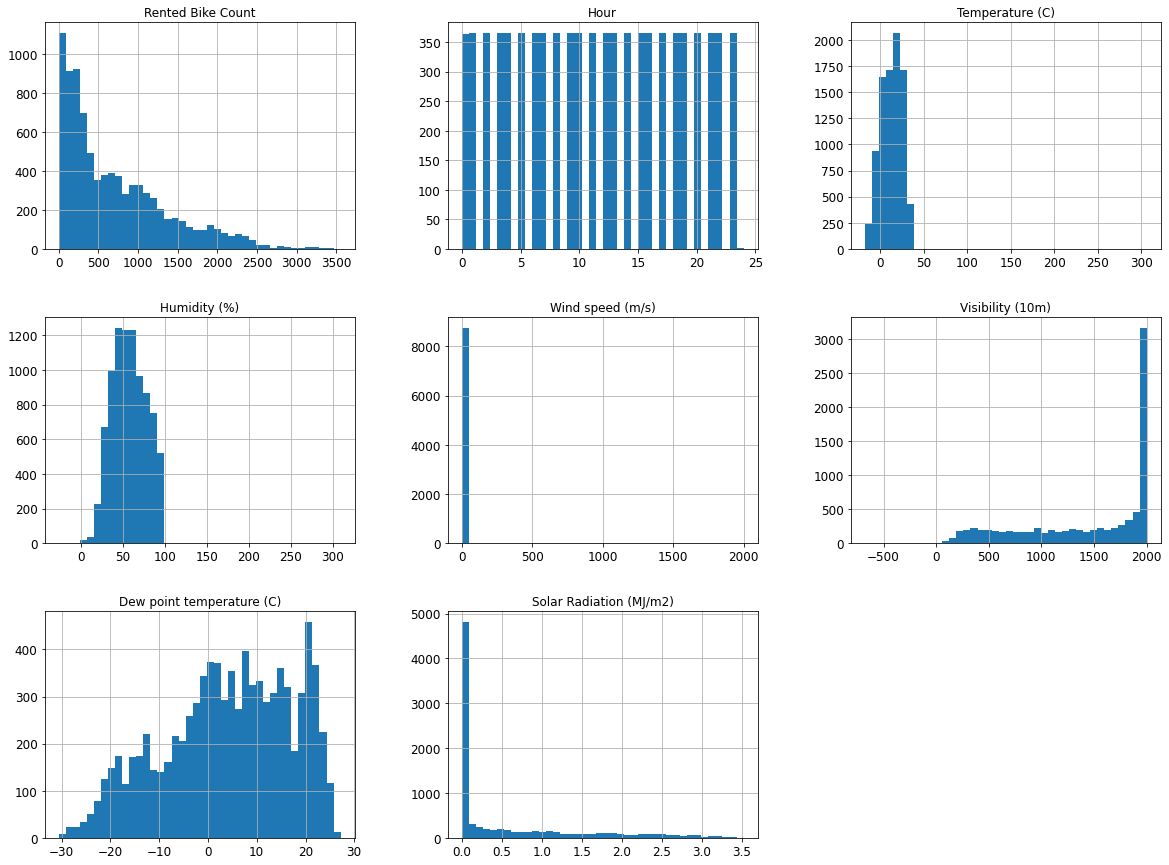

In [3]:
### Your code here

# Plot a histogram for each numerical attribute
df.hist(bins=40, figsize=(20, 15))
plt.show()

### 1.3 Removing unwanted information

The "Functioning day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so **remove rows from the DataFrame where the business is closed.** Hint: you can use the `DataFrame.loc()` function to do this. As a sanity check, ensure that the rows you are removing contain zero bike rentals! **After doing this, delete the Functioning Day feature from the DataFrame** and verify that this worked.

In [4]:
### Your code here

# Remove rows from the DataFrame where the business is closed
df = df.loc[df['Functioning Day'] == 'Yes']
df = df.drop(['Functioning Day'], axis = 1)

# Get number of rows contain any zero bike rentals
print("Number of rows contain zero Rented Bike Count is", df.loc[df['Rented Bike Count'] == 0].shape[0])

# Display first 5 rows
display(df.head())

# Get a quick description of the data
df.info()

# Summary of the numerical attributes
display(df.describe().T)

Number of rows contain zero Rented Bike Count is 0


,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8463 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Seasons                    8465 non-null   object 
 12  Holiday                    8465 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage:

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8465.0,729.156999,642.351166,2.0,214.0,542.00,1084.00,3556.00
Hour,8465.0,11.509864,6.921101,0.0,6.0,12.00,18.00,24.00
Temperature (C),8465.0,12.803591,12.515429,-17.8,3.0,13.50,22.70,306.00
Humidity (%),8465.0,58.161607,20.713601,-26.0,42.0,57.00,74.00,309.00
Wind speed (m/s),8464.0,1.962169,21.744979,0.0,0.9,1.50,2.30,2000.00
Visibility (10m),8465.0,1433.477141,609.596083,-678.0,935.0,1689.00,2000.00,2000.00
Dew point temperature (C),8464.0,3.945558,13.243081,-30.6,-5.1,4.70,15.20,27.20
Solar Radiation (MJ/m2),8465.0,0.567868,0.868245,0.0,0.0,0.01,0.93,3.52


### 1.4 Numerical encoding

The main task is to predict future bike rental demand from this data. Hence the target feature is "Bike Rental Count". You will use regression techniques to do this, but this requires that the other features are numerical.

The Holiday and Season features both need to be converted to a simple numerical format. **Write code to convert the Holiday feature to 0 or 1 from its current format.** 

In [5]:
### Your code here

# Convert the Holiday feature to 0 or 1 from its current format
df['Holiday'] = df['Holiday'].replace(['No Holiday', 'Holiday'], [0, 1])

The Season feature is a little tricker. A number could be assigned to each season, but a better solution in this case is to **add 4 new columns**, each labelled by a season, and each storing 0 or 1 according to the season in each row. In other words, the "Winter" column contains 1 whenever the season is winter, and 0 elsewhere. **Do this for each season. Afterwards, remember to delete the Season feature.**

In [6]:
### Your code here

# List of seasons
list_seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Create new columns based on 4 seasons
for season in list_seasons:
    df[season] = np.where(df['Seasons'] == season, 1, 0)

# Delete seasons column
df = df.drop('Seasons', axis = 1)

It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [7]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:

# Create a new feature
df['Weekday'] = df['Date'].transform(date_is_weekday)

# Remove column Date
df.drop(['Date'], axis=1, inplace=True)

# Display the dataframe
display(df)

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Spring,Summer,Autumn,Winter,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,0,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,0,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,0,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,0,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0,0,0,0,0,1,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0,0,0,0,0,1,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0,0,0,0,0,1,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0,0,0,0,0,1,0,1


**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

In [8]:
### Your code here

# Convert all the remaining data to numerical format
df = df.apply(lambda data: pd.to_numeric(data, errors = 'coerce'))

## Step 2: Visualise the data and perform further processing (20%)

### 2.1 Visualisation

Use **at least two graphical methods to display your data** and **identify** problematic entries. **Write one sentence** that summarises what you found about problematic entries.

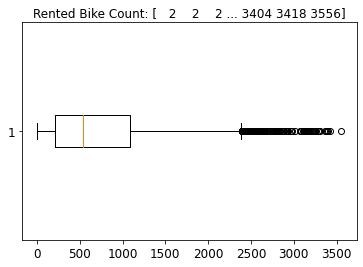

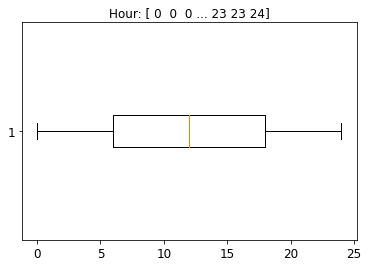

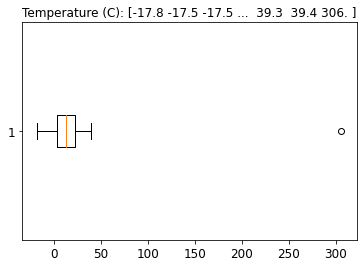

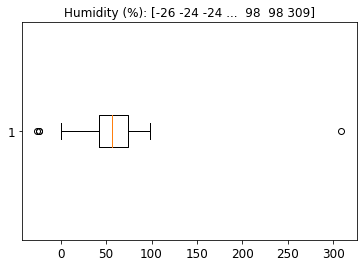

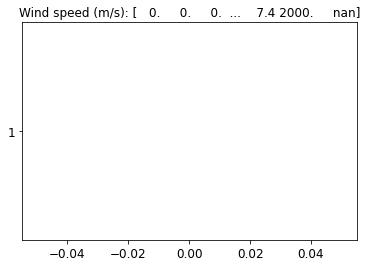

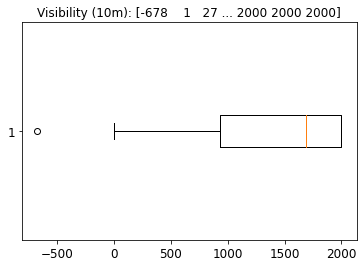

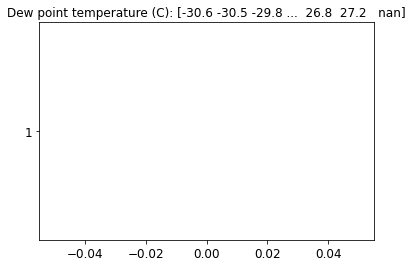

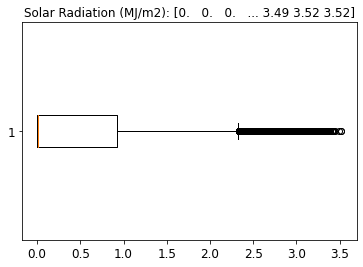

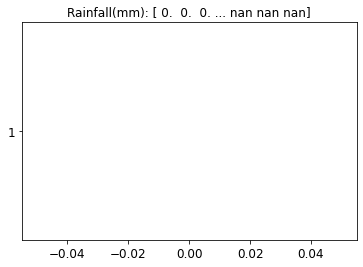

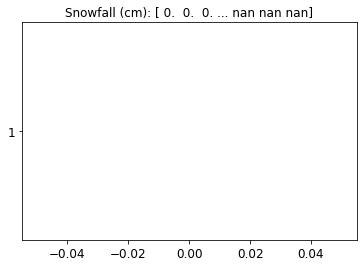

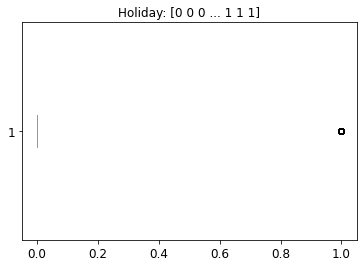

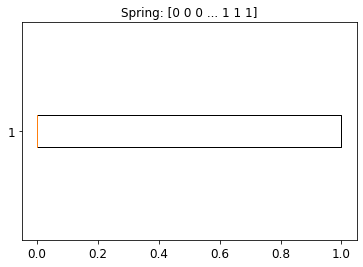

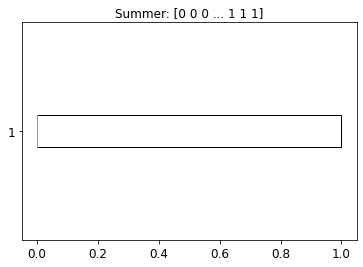

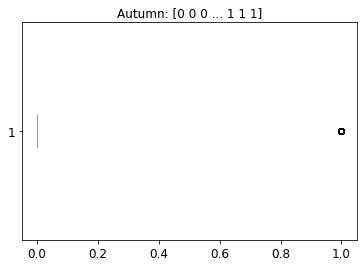

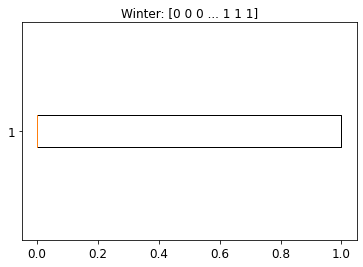

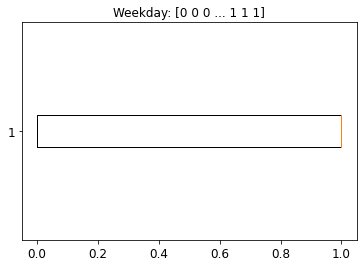

In [9]:
### Your code here

# Visualise using boxplots
for n in range(df.shape[1]):
    plt.boxplot(df.iloc[:,n],vert=False)
    plt.title(f'{df.columns[n]}: {np.sort(df.iloc[:,n])}')
    plt.show()

Rented Bike Count: [   2    2    2 ... 3404 3418 3556]


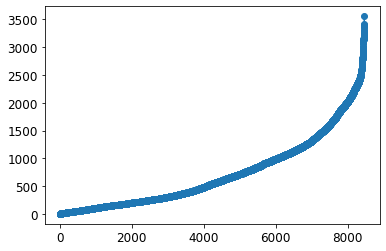

Hour: [ 0  0  0 ... 23 23 24]


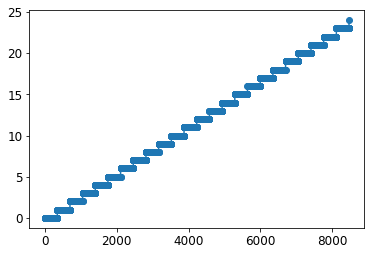

Temperature (C): [-17.8 -17.5 -17.5 ...  39.3  39.4 306. ]


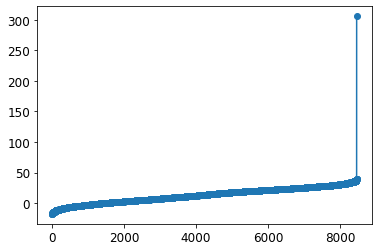

Humidity (%): [-26 -24 -24 ...  98  98 309]


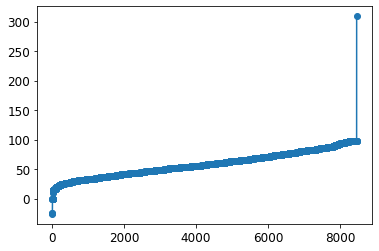

Wind speed (m/s): [   0.     0.     0.  ...    7.4 2000.     nan]


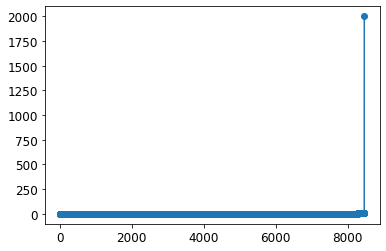

Visibility (10m): [-678    1   27 ... 2000 2000 2000]


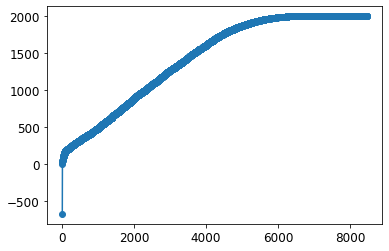

Dew point temperature (C): [-30.6 -30.5 -29.8 ...  26.8  27.2   nan]


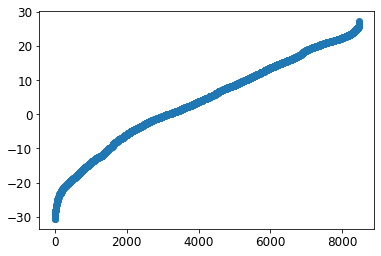

Solar Radiation (MJ/m2): [0.   0.   0.   ... 3.49 3.52 3.52]


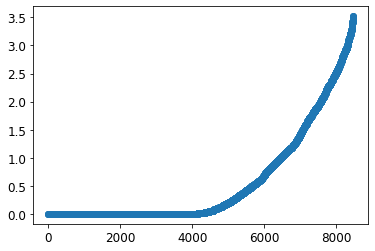

Rainfall(mm): [ 0.  0.  0. ... nan nan nan]


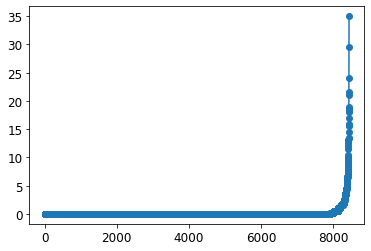

Snowfall (cm): [ 0.  0.  0. ... nan nan nan]


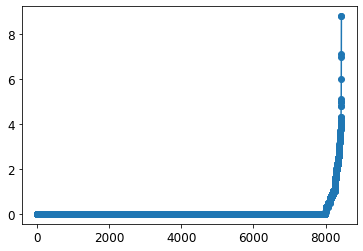

Holiday: [0 0 0 ... 1 1 1]


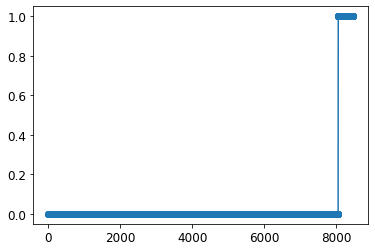

Spring: [0 0 0 ... 1 1 1]


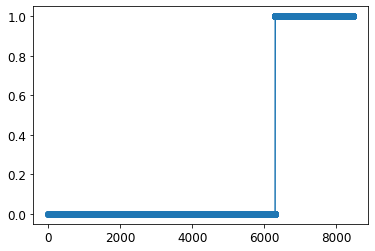

Summer: [0 0 0 ... 1 1 1]


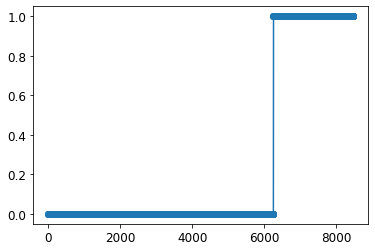

Autumn: [0 0 0 ... 1 1 1]


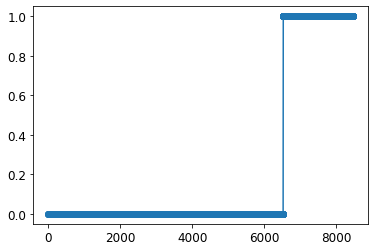

Winter: [0 0 0 ... 1 1 1]


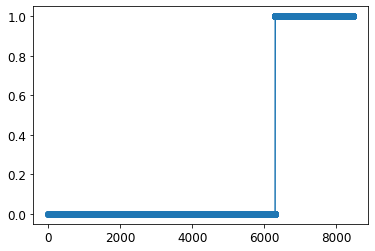

Weekday: [0 0 0 ... 1 1 1]


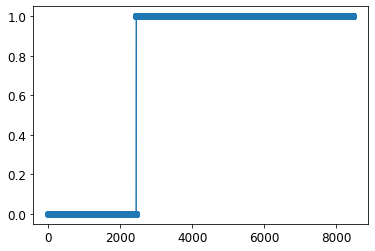

In [10]:
# Visualise using sorted values
for n in range(df.shape[1]):
    print(f'{df.columns[n]}: {np.sort(df.iloc[:,n])}')
    plt.plot(np.sort(df.iloc[:,n]),'-o')
    plt.show()

### Your summary sentence about problematic entries
There are outliers in 4 columns including temperature, humidity, wind speed, and visibility. For example, there are points of temperature, humidity, wind speed, and visibility that defy common sense, which are around 300 degrees Celsius, more than 100 percent relative humidity, 2000 metres per second wind speed, and negative visibility.

### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [11]:
### Your code here

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
# 1. Set any problematic values in the numerical data to np.nan (Temperature, Humidity, Wind speed and Visibility)

list_outlier_columns = ['Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)', 'Visibility (10m)']
list_outlier_columns_scale = [1.5, 1.5, 3.7, 1.5] # Scale to find outliers

# Find and replace outliers in each column
for index, column in enumerate(list_outlier_columns):
    
    # finding the 1st quartile
    q1 = np.nanquantile(df[column], 0.25)
 
    # finding the 3rd quartile
    q3 = np.nanquantile(df[column], 0.75)
 
    # finding the iqr region
    iqr = q3-q1
    
    # finding upper and lower whiskers
    scale = list_outlier_columns_scale[index]
    upper_bound = q3+(scale*iqr)
    lower_bound = q1-(scale*iqr)

    # Find and replace outliers with np.nan
    series = df[column]
    condition = (series <= lower_bound) | (series >= upper_bound)
    df[column].mask(condition, np.nan, inplace=True)
    
# Check this has worked
display(df.describe().T)

# 2. specify a sklearn pipeline that will perform imputation to replace problematic entries (nan values) 
# with an appropriate median and standard scaler

pl_linear = Pipeline ([
    ('imputer', SimpleImputer (strategy="median")),
    ('scaler', StandardScaler())])

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8465.0,729.156999,642.351166,2.0,214.0,542.00,1084.00,3556.00
Hour,8465.0,11.509864,6.921101,0.0,6.0,12.00,18.00,24.00
Temperature (C),8464.0,12.768951,12.103538,-17.8,3.0,13.50,22.70,39.40
Humidity (%),8461.0,58.161328,20.478908,0.0,42.0,57.00,74.00,98.00
Wind speed (m/s),8463.0,1.726078,1.034324,0.0,0.9,1.50,2.30,7.40
Visibility (10m),8464.0,1433.726607,609.199826,1.0,935.0,1689.50,2000.00,2000.00
Dew point temperature (C),8464.0,3.945558,13.243081,-30.6,-5.1,4.70,15.20,27.20
Solar Radiation (MJ/m2),8465.0,0.567868,0.868245,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8440.0,0.149562,1.127177,0.0,0.0,0.00,0.00,35.00
Snowfall (cm),8442.0,0.077896,0.444649,0.0,0.0,0.00,0.00,8.80


### 2.3 Correlation 

It is also useful to look at how strongly correlated the features are to the desired target (Rented Bike Count). Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed. **Why is it important to not use this version of the pre-processed data again?**

In [13]:
### Your code here

# Make a temporary version of the whole dataset that is pre-processed
preprocessed_data = pl_linear.fit_transform(df)

# Convert preprocessed_data to dataframe
preprocessed_data = pd.DataFrame(preprocessed_data, index = df.index, columns = df.columns)

# Discribe data after preprocessing
display(preprocessed_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8465.0,-7.353834e-16,1.000059,-1.132091,-0.802034,-0.291380,0.552445,4.401035
Hour,8465.0,2.177427e-16,1.000059,-1.663109,-0.796144,0.070822,0.937787,1.804753
Temperature (C),8465.0,1.249758e-15,1.000059,-2.525926,-0.807218,0.060400,0.820598,2.200522
Humidity (%),8465.0,-6.180329e-15,1.000059,-2.840870,-0.789375,-0.056698,0.773669,1.945951
Wind speed (m/s),8465.0,8.954575e-17,1.000059,-1.669033,-0.798750,-0.218562,0.555023,5.486624
Visibility (10m),8465.0,1.474885e-15,1.000059,-2.352120,-0.818796,0.419847,0.929587,0.929587
Dew point temperature (C),8465.0,8.052101e-16,1.000059,-2.608889,-0.683128,0.056969,0.849929,1.756170
Solar Radiation (MJ/m2),8465.0,-4.115104e-15,1.000059,-0.654079,-0.654079,-0.642561,0.417110,3.400314
Rainfall(mm),8465.0,-1.304207e-15,1.000059,-0.132495,-0.132495,-0.132495,-0.132495,30.965527
Snowfall (cm),8465.0,-7.366497e-15,1.000059,-0.174951,-0.174951,-0.174951,-0.174951,19.643216


It is important to not use this version of the pre-processed data again because:
1. This version of the pre-processed data is made from the whole dataset (before spliting to training/validation/test set).
2. The initial step in the pipeline is to replace nan values with an acceptable median value (imputation), therefore the median of the whole data set is used to replace nan values. Therefore, it transmits information from the train set to the test set accidentally.
3. The second step in the pipeline is scaler, it standardize features by removing the mean and scaling to unit variance. The result after applying scaler will be different between the whole dataset and the subset (training/validation/test set)

To visualise the strength of the relationships, display a **scatter plot** for each feature (separately) vs the target variable.  Also **calculate the correlation** of each feature with the target (Hint: pandas function `corr()` or numpy `corrcoef()`). **Which 3 attributes are the most correlated with bike rentals?**

,Correlation to the target
Rented Bike Count,1.000000
Temperature (C),0.562774
Hour,0.425460
Dew point temperature (C),0.400234
Summer,0.282001
Solar Radiation (MJ/m2),0.273862
Visibility (10m),0.210937
Autumn,0.165333
Wind speed (m/s),0.125151
Weekday,0.046360


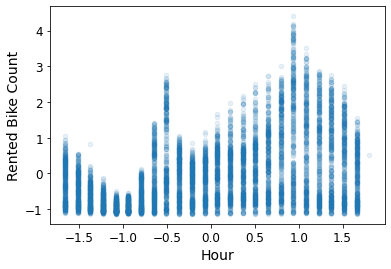

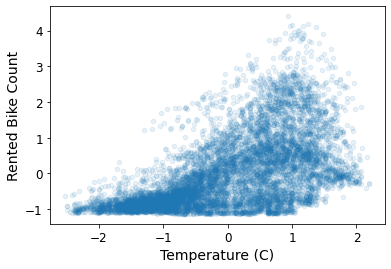

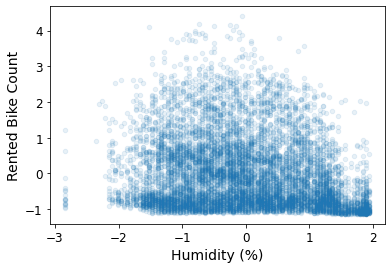

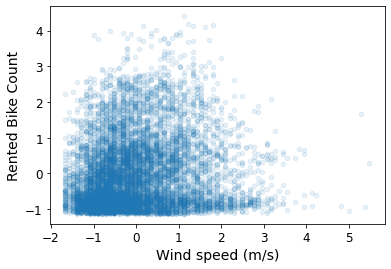

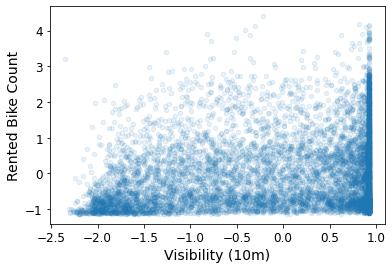

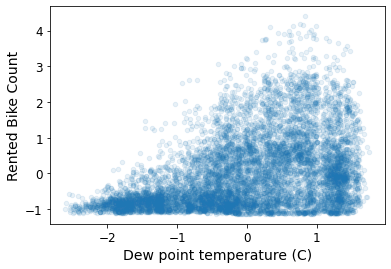

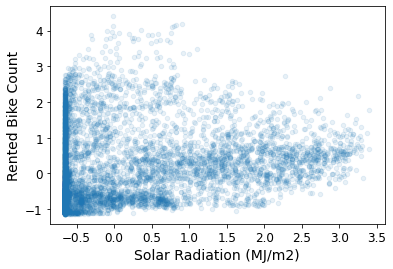

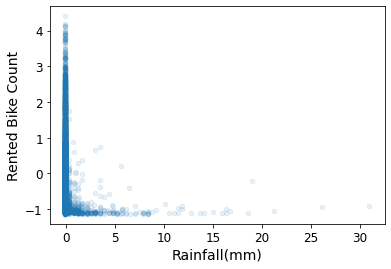

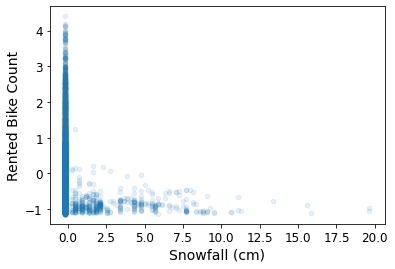

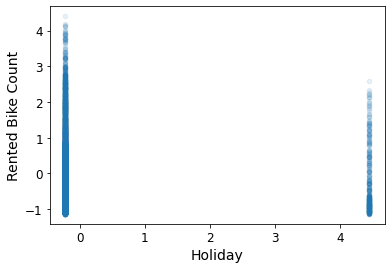

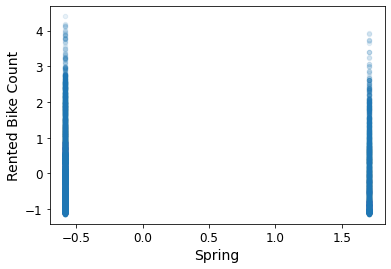

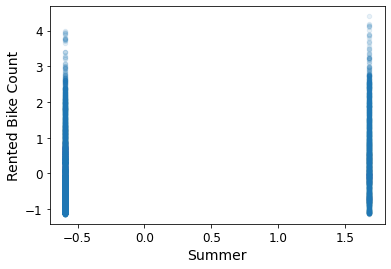

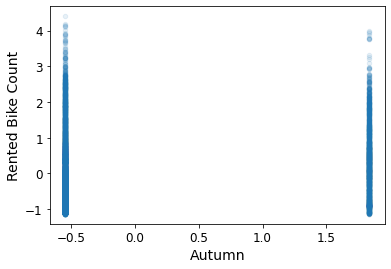

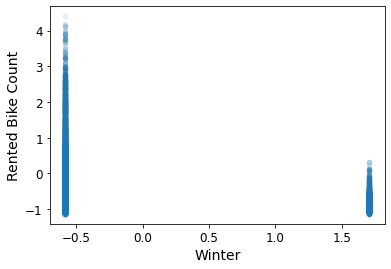

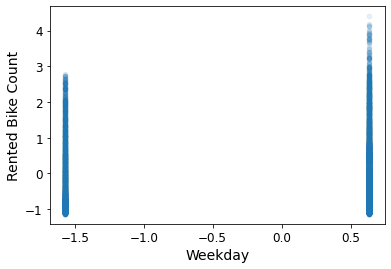

In [14]:
### Your code here

from pandas.plotting import scatter_matrix

# 1. Display a scatter plot for each feature vs the target variable
for column in preprocessed_data.columns:
    if (column == 'Rented Bike Count'):
        continue
        
    preprocessed_data.plot(kind = 'scatter',
                          x = column,
                          y = 'Rented Bike Count',
                          alpha = 0.1)

# 2. Calculate the correlation of each feature with the target
# Correlation matrix
corr_matrix = preprocessed_data.corr()

# Dataframe of correlation to the target
df_correlation = pd.DataFrame(corr_matrix.unstack().sort_values(ascending=False)['Rented Bike Count'], columns=['Correlation to the target'])
display(df_correlation)

Top 3 attributes which are the most correlated with bike rentals are:
1. Temperature (C) (Positive correlation)
2. Hour (Positive correlation)
3. Winter (Negative correlation)

## Step 3: Predicting bike rentals (25%)

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (rmse) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Build a pipeline** starting with the one specified in section 2.2 above, and now include a ***linear regression* model**. After you've done this, **fit** this to your training data for a quick test. To get an idea of how successful this model is, **calculate the rmse of the fit to the training data**. To act as a simple baseline for comparison, **also calculate the rmse** that you would get if all the predictions were equal to the **mean of the training targets** (i.e. bike rentals).


In [15]:
### Your code here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pl_linear.steps.append(('lr',LinearRegression()))

In [16]:
from sklearn.metrics import mean_squared_error

# Split the data appropriately so that 20% of it will be kept as a hold-out test set
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop(['Rented Bike Count'], axis=1)
y_train = train_set['Rented Bike Count'].copy()
X_test = test_set.drop(['Rented Bike Count'], axis=1)
y_test = test_set['Rented Bike Count'].copy()

# Calculate the rmse of the fit to the training data
pl_linear.fit(X_train,y_train)
y_pred = pl_linear.predict(X_train)

# RMSE linear regression
rmse_lr = mean_squared_error(y_pred,y_train,squared=False)
print("RMSE training with linear regression:", rmse_lr)

# calculate the rmse that you would get if all the predictions were equal to the mean of the training targets
# Get mean of y train
mean_y_train = np.mean(y_train)

# create an array of the same value and shape as the training targets
mean_y_train_array = np.full(y_train.shape, mean_y_train)

# RMSE with mean
rmse_lr_mean = mean_squared_error(mean_y_train_array,y_train,squared=False)

print("RMSE training if all the predictions were equal to the mean of the training targets:", rmse_lr_mean)

RMSE training with linear regression: 437.3357979155291
RMSE training if all the predictions were equal to the mean of the training targets: 646.170499547999


Show an appropriate **visualisation of the fit for your linear regression.**

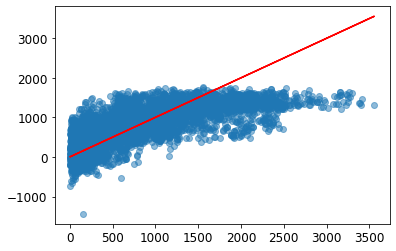

In [17]:
### Your code here
plt.scatter(y_train,y_pred,alpha=0.5)
plt.plot(y_train,y_train,'r-')

Now two other, different regression models (that you probably won't be familiar with) will be fit and later these will be compared to find the best one.

The second model to fit is ***Kernel Ridge*** regression (`from sklearn.kernel_ridge import KernelRidge`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

RMSE training with Kernel Ridge: 852.1499482092281
RMSE training if all the predictions were equal to the mean of the training targets: 646.170499547999


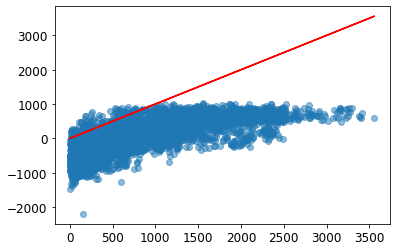

In [18]:
### Your code here
from sklearn.kernel_ridge import KernelRidge

# Create a pipeline using Kernel Ridge
pl_kernel_ridge = Pipeline ([
    ('imputer', SimpleImputer (strategy="median")), 
    ('scaler',StandardScaler()),
    ('kernel_ridge', KernelRidge())])

# Fit the pipeline
pl_kernel_ridge.fit(X_train,y_train)

# Predict
y_pred_kernel_ridge = pl_kernel_ridge.predict(X_train)

# RMSE kernel ridge regression
rmse_kernel_ridge = mean_squared_error(y_pred_kernel_ridge,y_train,squared=False)
print("RMSE training with Kernel Ridge:", rmse_kernel_ridge)
print("RMSE training if all the predictions were equal to the mean of the training targets:", rmse_lr_mean)

# Plot the fit
plt.scatter(y_train,y_pred_kernel_ridge,alpha=0.5)
plt.plot(y_train,y_train,'r-')

The third, and most powerful model, is ***Support Vector Regression*** (`from sklearn.svm import SVR`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

RMSE training with Support Vector Regression: 532.7053028975164
RMSE training if all the predictions were equal to the mean of the training targets: 646.170499547999


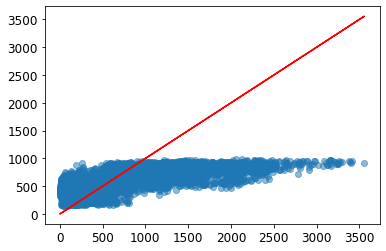

In [19]:
### Your code here
from sklearn.svm import SVR

# Create a pipeline using Support Vector Regression
pl_svr = Pipeline ([
    ('imputer', SimpleImputer (strategy="median")),
    ('scaler',StandardScaler()),
    ('svr', SVR())])

# Fit the pipeline
pl_svr.fit(X_train,y_train)

# Predict
y_pre_svr = pl_svr.predict(X_train)

# RMSE svr
rmse_svr = mean_squared_error(y_pre_svr,y_train,squared=False)
print("RMSE training with Support Vector Regression:", rmse_svr)
print("RMSE training if all the predictions were equal to the mean of the training targets:", rmse_lr_mean)

# Plot the fit
plt.scatter(y_train,y_pre_svr,alpha=0.5)
plt.plot(y_train,y_train,'r-')

## Step 4: Cross validation (20%)

**Perform a *10 fold cross validation* for each model.** This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run.

**Display the mean and standard deviation of the rmse values** obtained for each model **for the validation splits** using the same settings/parameters for the models as used above. **Also display the mean and standard deviation** of the rmse values obtained for the **training data splits**.

In [20]:
### Your code here
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Perform a 10 fold cross validation for each model.
kf = KFold(n_splits=10)

# List pipelines contains 3 models include linear regression, kernel ridge and svr
list_pipelines = [pl_linear, pl_kernel_ridge, pl_svr]

# Store rmse for calculating Mean and Std
rmse_data = {
    'training_rmse': {
            'Linear Regression': np.array([])
            ,'Kernel Ridge': np.array([])
            ,'Support Vector Regression': np.array([])
        }
    ,
    'validation_rmse':{
            'Linear Regression': np.array([])
            ,'Kernel Ridge': np.array([])
            ,'Support Vector Regression': np.array([])
        }
}

# Index of fold
fold_index = 0
print("Display rmse values for each fold and each model")
for train_index, validation_index in kf.split(X_train, y_train):
    X_train_cv, X_validation_cv = X_train.iloc[train_index], X_train.iloc[validation_index]
    y_train_cv, y_validation_cv = y_train.iloc[train_index], y_train.iloc[validation_index]

    fold_index += 1
    print(f"Fold {fold_index}:")

    # Perform for each model
    for index, pipeline in enumerate(list_pipelines):
        
        # Get current pipeline name in list pipelines
        pipeline_name = list(rmse_data['training_rmse'].keys())[index]

        # Training
        pipeline.fit(X_train_cv,y_train_cv)
        
        # Predict
        y_pred_train = pipeline.predict(X_train_cv)
        y_pred_validation = pipeline.predict(X_validation_cv)
        
        # Calculate RMSE
        rmse_training = mean_squared_error(y_train_cv, y_pred_train, squared=False)
        rmse_validation = mean_squared_error(y_validation_cv, y_pred_validation, squared=False)
        
        print(f"\tTraining RMSE for {pipeline_name}: {rmse_training}")
        print(f"\tValidation RMSE for {pipeline_name}: {rmse_validation}")
        print()

        # Store training RMSE into rmse_data
        rmse_data['training_rmse'][pipeline_name] = np.append(
            rmse_data['training_rmse'][pipeline_name],
            rmse_training
        )

        # Store validation RMSE into rmse_data
        rmse_data['validation_rmse'][pipeline_name] = np.append(
            rmse_data['validation_rmse'][pipeline_name],
            rmse_validation
        )

# Display the mean and standard deviation of the rmse values
print("Display mean and standard deviation of the rmse values for each model")
print()
for index, pipeline in enumerate(list_pipelines):

    # Get current pipeline name in list pipelines
    pipeline_name = list(rmse_data['training_rmse'].keys())[index]
    
    print(f"{index + 1}.{pipeline_name}:")
    
    # Calculate mean and std of rmse for training set
    rmse_training_array = rmse_data['training_rmse'][pipeline_name]
    mean_training = np.mean(rmse_training_array)
    std_training = np.std(rmse_training_array)
    
    # Calculate mean and std of rmse for validation set
    rmse_validation_array = rmse_data['validation_rmse'][pipeline_name]
    mean_validation = np.mean(rmse_validation_array)
    std_validation = np.std(rmse_validation_array)
    
    print(f"\tMean of RMSE for training set: {mean_training}")
    print(f"\tStd of RMSE for training set: {std_training}")
    print()
    print(f"\tMean of RMSE for validation set: {mean_validation}")
    print(f"\tStd of RMSE for validation set: {std_validation}")
    print()


Display rmse values for each fold and each model
Fold 1:
	Training RMSE for Linear Regression: 437.6558395253988
	Validation RMSE for Linear Regression: 434.5378923053841

	Training RMSE for Kernel Ridge: 853.0859828078535
	Validation RMSE for Kernel Ridge: 853.2713685602372

	Training RMSE for Support Vector Regression: 540.536979172284
	Validation RMSE for Support Vector Regression: 540.5319119257485

Fold 2:
	Training RMSE for Linear Regression: 436.6568371536837
	Validation RMSE for Linear Regression: 445.0493805645646

	Training RMSE for Kernel Ridge: 851.0470040270104
	Validation RMSE for Kernel Ridge: 855.3869490129648

	Training RMSE for Support Vector Regression: 539.2111402507098
	Validation RMSE for Support Vector Regression: 552.5908373217263

Fold 3:
	Training RMSE for Linear Regression: 436.7735062906669
	Validation RMSE for Linear Regression: 444.80967945765406

	Training RMSE for Kernel Ridge: 851.8655681509217
	Validation RMSE for Kernel Ridge: 846.7923545710539

	Trai

On the basis of the results you found above, would you say that any of the models were **under-fitting or over-fitting**?  

**Which method do you think is the best** out of these three?

On the basis of the results you found above, 3 models are under-fitting because rented bike count range between 3 and 3556, and means of rmse of all models are very large (e.g., 437, 852, 540).

The best method out of these three is linear regression because it has the smallest error.

## Step 5: Grid parameter search (15%)

Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. **Choose either the KernelRidge or SVR** (your choice entirely), and use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function `GridSearchCV` to do this. 

For KernelRidge, vary the hyperparameter `alpha`.

For SVR, vary the hyperparameter `C`.

**Print out the hyperparameter setting** for the best (i.e. chosen) method. 

Finally, **train and apply your chosen method**, with appropriate hyperparameter settings, to the ***test set* and report the performance**. 

In [21]:
### Your code here
parameters = [{'svr__C':[0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000]}]

# Grid search
gridcv = GridSearchCV(
    estimator = pl_svr, 
    param_grid = parameters, 
    cv=10, 
    scoring='neg_root_mean_squared_error')

# Fit
gridcv.fit(X_train, y_train)

# Print score of all svr__C hyperparameters
gridcv.cv_results_['rmse_best_score'] = -gridcv.cv_results_['mean_test_score']
print(pd.DataFrame(gridcv.cv_results_)[['params','rmse_best_score','std_test_score']])

# Best score
print(f'Best score is {-gridcv.best_score_} for best params of {gridcv.best_params_}')  

              params  rmse_best_score  std_test_score
0  {'svr__C': 0.001}       672.727694       20.732471
1   {'svr__C': 0.01}       670.804058       20.734785
2    {'svr__C': 0.1}       653.324163       20.859459
3    {'svr__C': 1.0}       540.819196       20.274576
4     {'svr__C': 10}       397.824686       15.008801
5    {'svr__C': 100}       336.840570       10.478326
6   {'svr__C': 1000}       299.402052        8.230148
7  {'svr__C': 10000}       263.314166        9.918591
Best score is 263.3141657778391 for best params of {'svr__C': 10000}


RMSE on test set : 245.33957396526822


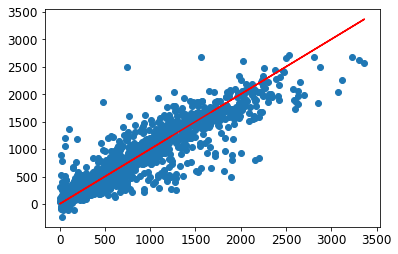

In [22]:
gridcv.best_estimator_.fit(X_train,y_train)

y_pred_test = gridcv.best_estimator_.predict(X_test)

rmse_test = mean_squared_error(y_test,y_pred_test,squared=False)
print(f"RMSE on test set : {rmse_test}")

plt.scatter(y_test,y_pred_test)
plt.plot(y_test,y_test,'r-')

**How different was the test set performance to the validation performance, and is this suggestive of over-fitting, under-fitting or neither?**

In [23]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8465.0,729.156999,642.351166,2.0,214.0,542.00,1084.00,3556.00
Hour,8465.0,11.509864,6.921101,0.0,6.0,12.00,18.00,24.00
Temperature (C),8464.0,12.768951,12.103538,-17.8,3.0,13.50,22.70,39.40
Humidity (%),8461.0,58.161328,20.478908,0.0,42.0,57.00,74.00,98.00
Wind speed (m/s),8463.0,1.726078,1.034324,0.0,0.9,1.50,2.30,7.40
Visibility (10m),8464.0,1433.726607,609.199826,1.0,935.0,1689.50,2000.00,2000.00
Dew point temperature (C),8464.0,3.945558,13.243081,-30.6,-5.1,4.70,15.20,27.20
Solar Radiation (MJ/m2),8465.0,0.567868,0.868245,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8440.0,0.149562,1.127177,0.0,0.0,0.00,0.00,35.00
Snowfall (cm),8442.0,0.077896,0.444649,0.0,0.0,0.00,0.00,8.80


1. The test set performance is better than the validation set performance.

2. From the cross validation result, the SVR model has the following RMSE:

    - Training set:
         - Mean of RMSE: around 540.8

         - Std of RMSE: around 2.06
    
    - Validation set:

        - Mean of RMSE: around 540.82

        - Std of RMSE: around 20.27

3. When using the SVR model with its default settings, the mean of rmse in both training set and validation set is near to 50 percent of rented bike count, indicating a reasonably high error. However, after adjusting the hyperparameter, the RMSE of the test set is around 245.34 which is much less than the median of the target feature and near to the first quarter, which is deemed to be reasonably low.

=> This SVR model is not over-fitting or under-fitting.